# **Parte 1 - Carregamento e Tratamento dos Dados**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Carregando os dados
df = pd.read_csv('../dados/Obesity.csv')

In [5]:
# Visualizando as primeiras linhas
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
# Informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [7]:
# Dimensões do dataset
df.shape

(2111, 17)

In [8]:
# Verificando valores nulos
df.isnull().sum()
# Não há valores nulos no dataset, sem necessidade de drop

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

In [9]:
# Verificando duplicatas
duplicatas = df.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicatas}")

if duplicatas > 0:
    print(f"\nRemovendo {duplicatas} linhas duplicadas...")
    df = df.drop_duplicates()
    print(f"Dataset após remoção de duplicatas: {df.shape[0]} registros")
else:
    print("Não há linhas duplicadas no dataset.")

Número de linhas duplicadas: 24

Removendo 24 linhas duplicadas...
Dataset após remoção de duplicatas: 2087 registros


In [10]:
# Estatísticas descritivas
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [11]:
# Distribuição da variável target
df['Obesity'].value_counts()

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

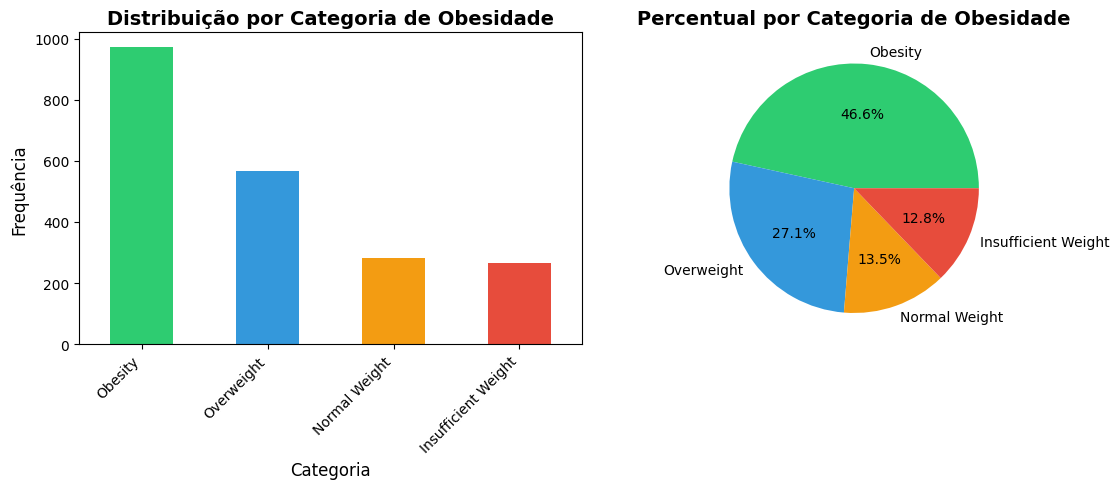

Distribuição por Categoria de Obesidade:

Obesity_Category
Obesity                972
Overweight             566
Normal Weight          282
Insufficient Weight    267
Name: count, dtype: int64

Percentual por Categoria:

Obesity_Category
Obesity                46.574030
Overweight             27.120268
Normal Weight          13.512218
Insufficient Weight    12.793483
Name: proportion, dtype: float64


In [12]:
# Criando categorias agrupadas de obesidade
def categorizar_obesidade(valor):
    if 'Insufficient' in valor:
        return 'Insufficient Weight'
    elif 'Normal' in valor:
        return 'Normal Weight'
    elif 'Overweight' in valor:
        return 'Overweight'
    elif 'Obesity' in valor:
        return 'Obesity'
    else:
        return 'Other'

# Aplicando a categorização
df['Obesity_Category'] = df['Obesity'].apply(categorizar_obesidade)

# Visualizando a distribuição das categorias
plt.figure(figsize=(12, 5))

# Gráfico de barras
plt.subplot(1, 2, 1)
df['Obesity_Category'].value_counts().plot(kind='bar', color=['#2ecc71', '#3498db', '#f39c12', '#e74c3c'])
plt.title('Distribuição por Categoria de Obesidade', fontsize=14, fontweight='bold')
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Gráfico de pizza com percentuais
plt.subplot(1, 2, 2)
df['Obesity_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                            colors=['#2ecc71', '#3498db', '#f39c12', '#e74c3c'])
plt.title('Percentual por Categoria de Obesidade', fontsize=14, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()

# Exibindo os percentuais
print("Distribuição por Categoria de Obesidade:\n")
print(df['Obesity_Category'].value_counts())
print("\nPercentual por Categoria:\n")
print(df['Obesity_Category'].value_counts(normalize=True) * 100)

## Arredondamento de Variáveis Categóricas

Conforme o dicionário de dados, algumas variáveis aparecem com decimais (ruído) e devem ser arredondadas.

In [13]:
# Arredondando variáveis categóricas que aparecem com decimais
df['FCVC'] = df['FCVC'].round()
df['NCP'] = df['NCP'].round()
df['CH2O'] = df['CH2O'].round()
df['FAF'] = df['FAF'].round()
df['TUE'] = df['TUE'].round()

In [14]:
# Verificando as variáveis após arredondamento
print("FCVC (Frequência de consumo de vegetais):")
print(df['FCVC'].value_counts().sort_index())
print("\nNCP (Número de refeições principais):")
print(df['NCP'].value_counts().sort_index())
print("\nCH2O (Consumo diário de água):")
print(df['CH2O'].value_counts().sort_index())
print("\nFAF (Frequência de atividade física):")
print(df['FAF'].value_counts().sort_index())
print("\nTUE (Tempo usando dispositivos eletrônicos):")
print(df['TUE'].value_counts().sort_index())

FCVC (Frequência de consumo de vegetais):
FCVC
1.0    102
2.0    994
3.0    991
Name: count, dtype: int64

NCP (Número de refeições principais):
NCP
1.0     296
2.0     176
3.0    1466
4.0     149
Name: count, dtype: int64

CH2O (Consumo diário de água):
CH2O
1.0     478
2.0    1107
3.0     502
Name: count, dtype: int64

FAF (Frequência de atividade física):
FAF
0.0    714
1.0    759
2.0    495
3.0    119
Name: count, dtype: int64

TUE (Tempo usando dispositivos eletrônicos):
TUE
0.0    932
1.0    912
2.0    243
Name: count, dtype: int64


## Criando a Variável Target Binária

Vamos criar uma variável binária que indica se a pessoa tem obesidade (tipos I, II ou III) ou não.

In [15]:
# Criando variável target binária
# 1 = Obesidade (Obesity_Type_I, Obesity_Type_II, Obesity_Type_III)
# 0 = Sem Obesidade (demais categorias)

df['HasObesity'] = df['Obesity'].apply(lambda x: 1 if 'Obesity_Type' in x else 0)

In [16]:
# Verificando a distribuição da nova variável
print("Distribuição da variável HasObesity:")
print(df['HasObesity'].value_counts())
print("\nPercentual:")
print(df['HasObesity'].value_counts(normalize=True) * 100)

# Dataset se mostrou bem balanceado

Distribuição da variável HasObesity:
HasObesity
0    1115
1     972
Name: count, dtype: int64

Percentual:
HasObesity
0    53.42597
1    46.57403
Name: proportion, dtype: float64


# **Parte 2 - Análise Exploratória dos Dados**

In [17]:
# Configurações dos gráficos
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 6)

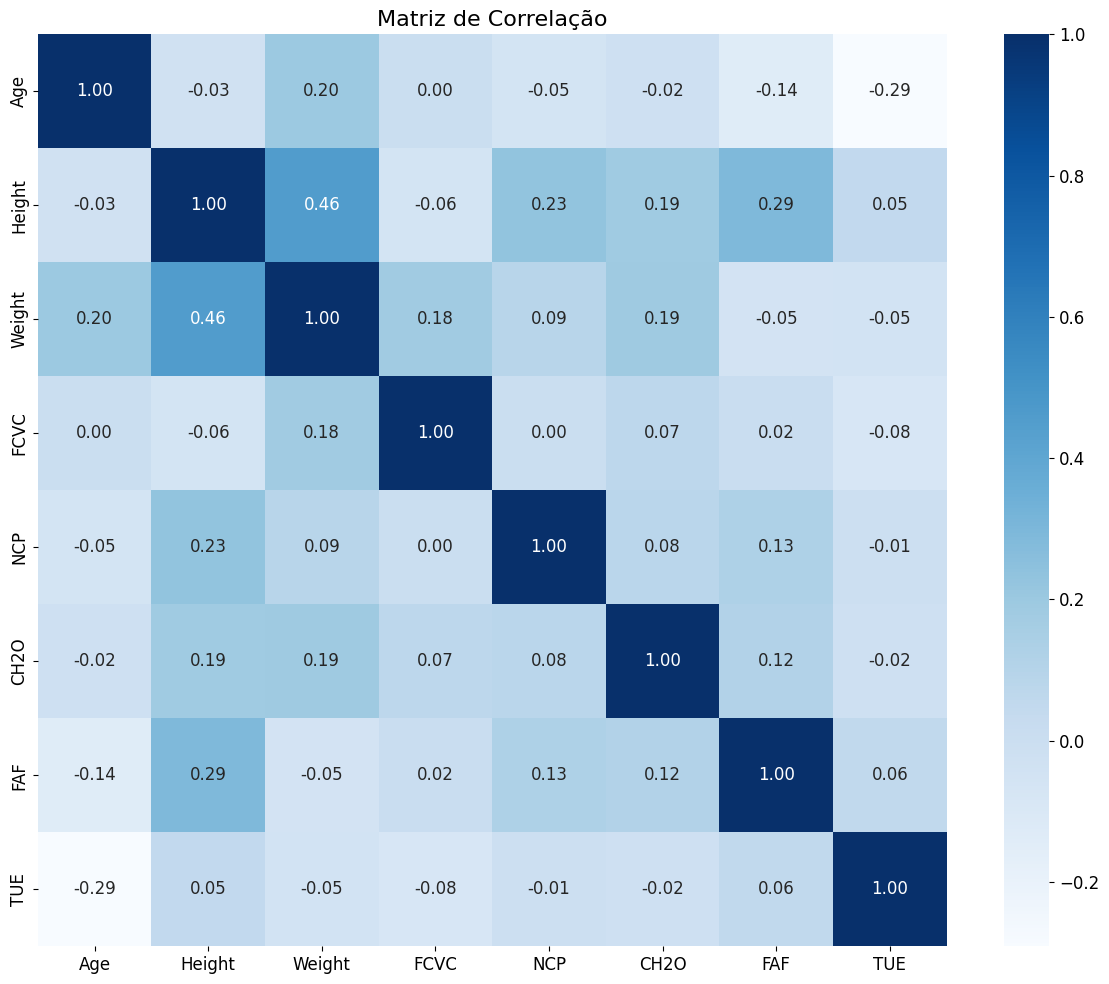

In [18]:
# Análise de correlação das variáveis numéricas
colunas_numericas = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
corr = df[colunas_numericas].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="Blues", annot=True, fmt='.2f')
plt.title('Matriz de Correlação', fontsize=16)
plt.tight_layout()
plt.show()

# Não foi verificada correlação acima de 50% entre as variáveis estudadas, portanto, nenhuma foi removida.

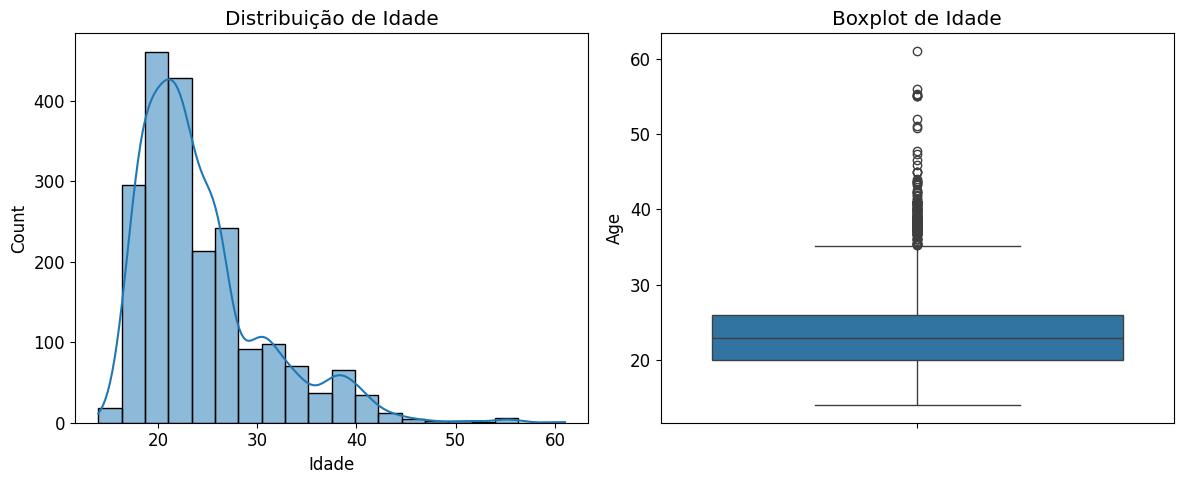

Age
18.000000    6.037374
26.000000    4.839483
23.000000    4.264494
21.000000    3.737422
19.000000    2.827024
               ...   
21.680123    0.047916
24.469756    0.047916
25.127910    0.047916
25.986368    0.047916
23.761970    0.047916
Name: proportion, Length: 1402, dtype: float64

In [19]:
# Distribuição de Idade
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Age')
plt.title('Boxplot de Idade')

plt.tight_layout()
plt.show()

df['Age'].value_counts(normalize = True) * 100

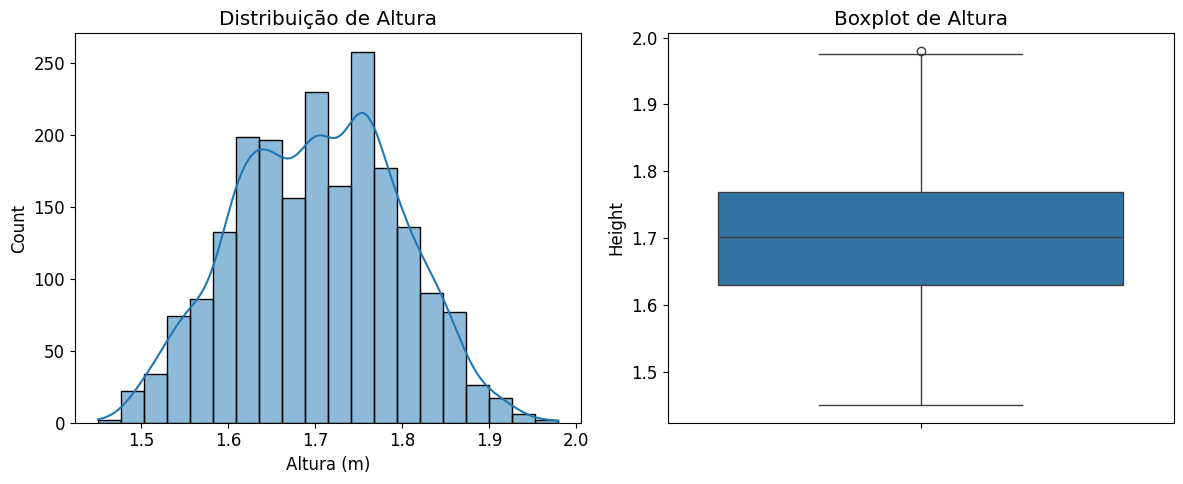

In [20]:
# Distribuição de Altura
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Height', bins=20, kde=True)
plt.title('Distribuição de Altura')
plt.xlabel('Altura (m)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Height')
plt.title('Boxplot de Altura')

plt.tight_layout()
plt.show()

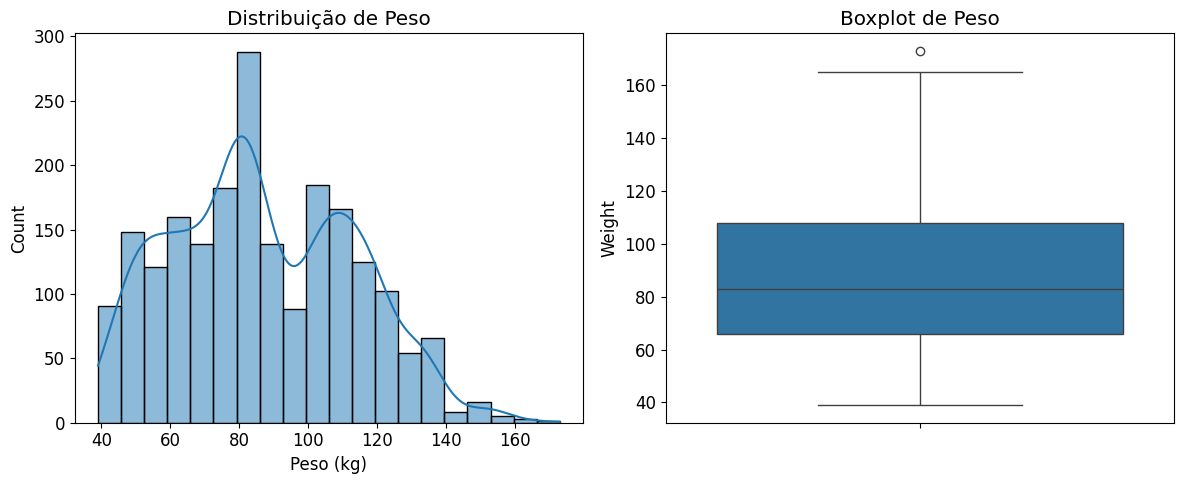

In [21]:
# Distribuição de Peso
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Weight', bins=20, kde=True)
plt.title('Distribuição de Peso')
plt.xlabel('Peso (kg)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Weight')
plt.title('Boxplot de Peso')

plt.tight_layout()
plt.show()

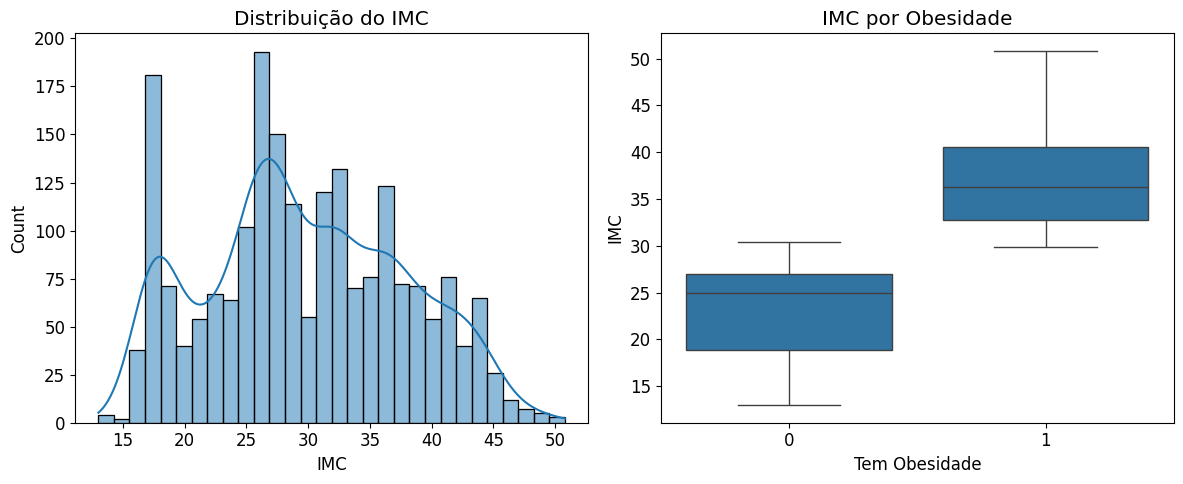

In [22]:
# Calculando o IMC (Índice de Massa Corporal)
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Visualizando a distribuição do IMC
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='BMI', bins=30, kde=True)
plt.title('Distribuição do IMC')
plt.xlabel('IMC')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='HasObesity', y='BMI')
plt.title('IMC por Obesidade')
plt.xlabel('Tem Obesidade')
plt.ylabel('IMC')

plt.tight_layout()
plt.show()

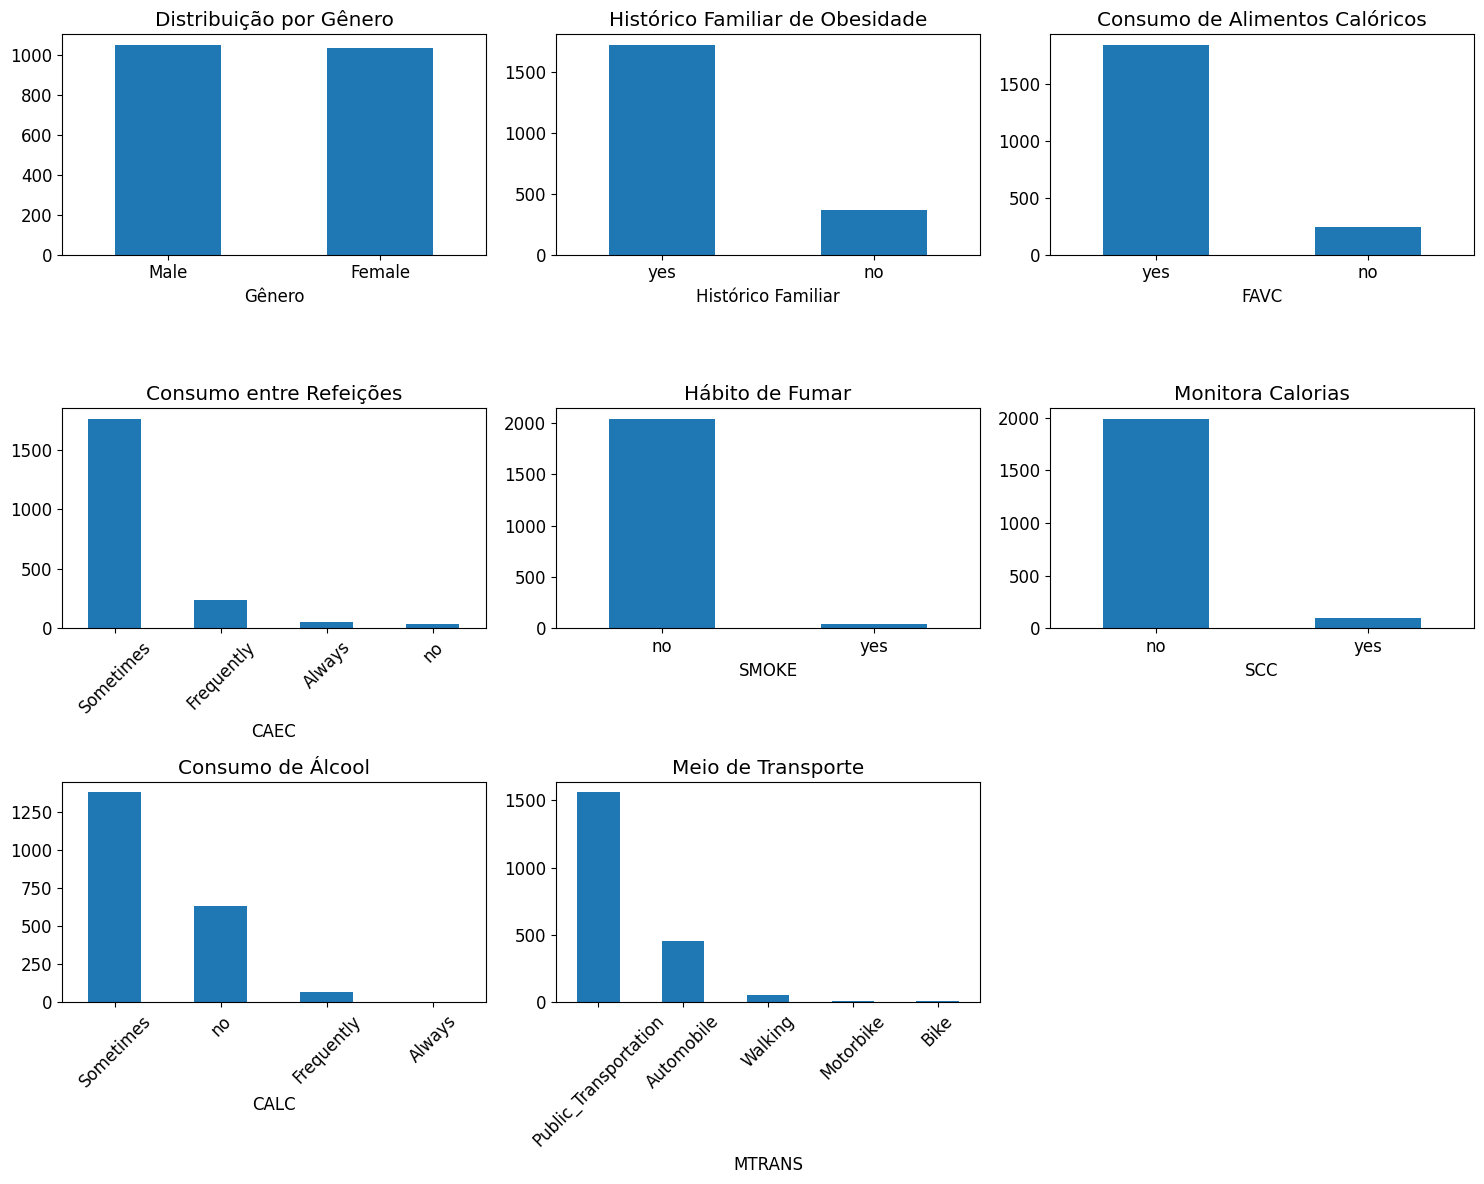

In [23]:
# Análise das variáveis categóricas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Gender
df['Gender'].value_counts().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Distribuição por Gênero')
axes[0, 0].set_xlabel('Gênero')
axes[0, 0].tick_params(axis='x', rotation=0)

# Family History
df['family_history'].value_counts().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Histórico Familiar de Obesidade')
axes[0, 1].set_xlabel('Histórico Familiar')
axes[0, 1].tick_params(axis='x', rotation=0)

# FAVC
df['FAVC'].value_counts().plot(kind='bar', ax=axes[0, 2])
axes[0, 2].set_title('Consumo de Alimentos Calóricos')
axes[0, 2].set_xlabel('FAVC')
axes[0, 2].tick_params(axis='x', rotation=0)

# CAEC
df['CAEC'].value_counts().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Consumo entre Refeições')
axes[1, 0].set_xlabel('CAEC')
axes[1, 0].tick_params(axis='x', rotation=45)

# SMOKE
df['SMOKE'].value_counts().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Hábito de Fumar')
axes[1, 1].set_xlabel('SMOKE')
axes[1, 1].tick_params(axis='x', rotation=0)

# SCC
df['SCC'].value_counts().plot(kind='bar', ax=axes[1, 2])
axes[1, 2].set_title('Monitora Calorias')
axes[1, 2].set_xlabel('SCC')
axes[1, 2].tick_params(axis='x', rotation=0)

# CALC
df['CALC'].value_counts().plot(kind='bar', ax=axes[2, 0])
axes[2, 0].set_title('Consumo de Álcool')
axes[2, 0].set_xlabel('CALC')
axes[2, 0].tick_params(axis='x', rotation=45)

# MTRANS
df['MTRANS'].value_counts().plot(kind='bar', ax=axes[2, 1])
axes[2, 1].set_title('Meio de Transporte')
axes[2, 1].set_xlabel('MTRANS')
axes[2, 1].tick_params(axis='x', rotation=45)

# Removendo o último subplot
fig.delaxes(axes[2, 2])

plt.tight_layout()
plt.show()

CORRELAÇÃO COM A VARIÁVEL TARGET (HasObesity)

1. Correlação Point-Biserial (Variáveis Numéricas):

Age            :  0.2131 (p-value: 7.4589e-23)
Height         :  0.1291 (p-value: 3.2643e-09)
Weight         :  0.7924 (p-value: 0.0000e+00)
BMI            :  0.8372 (p-value: 0.0000e+00)
FCVC           :  0.1444 (p-value: 3.3959e-11)
NCP            :  0.0100 (p-value: 6.4810e-01)
CH2O           :  0.1049 (p-value: 1.5667e-06)
FAF            : -0.1516 (p-value: 3.3063e-12)
TUE            : -0.0686 (p-value: 1.7203e-03)


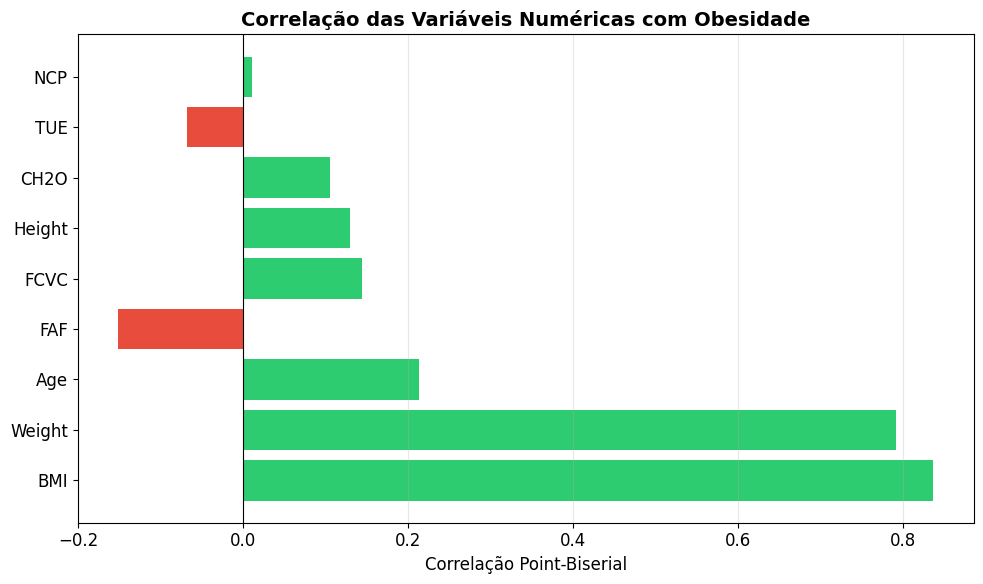


2. Cramér's V (Variáveis Categóricas):

Gender              :  0.0010
family_history      :  0.4084
FAVC                :  0.2805
CAEC                :  0.3557
SMOKE               :  0.0067
SCC                 :  0.1890
CALC                :  0.1635
MTRANS              :  0.1471


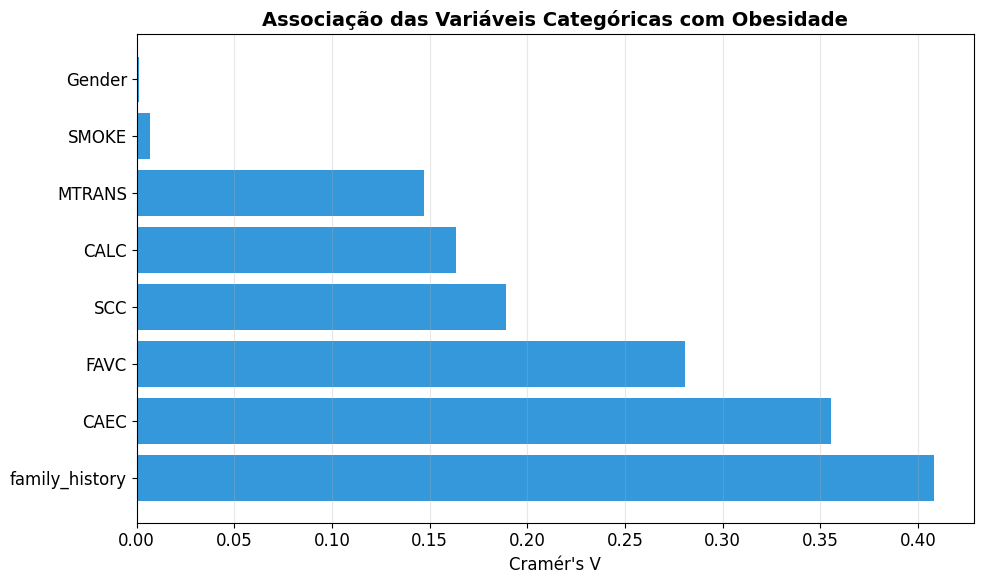

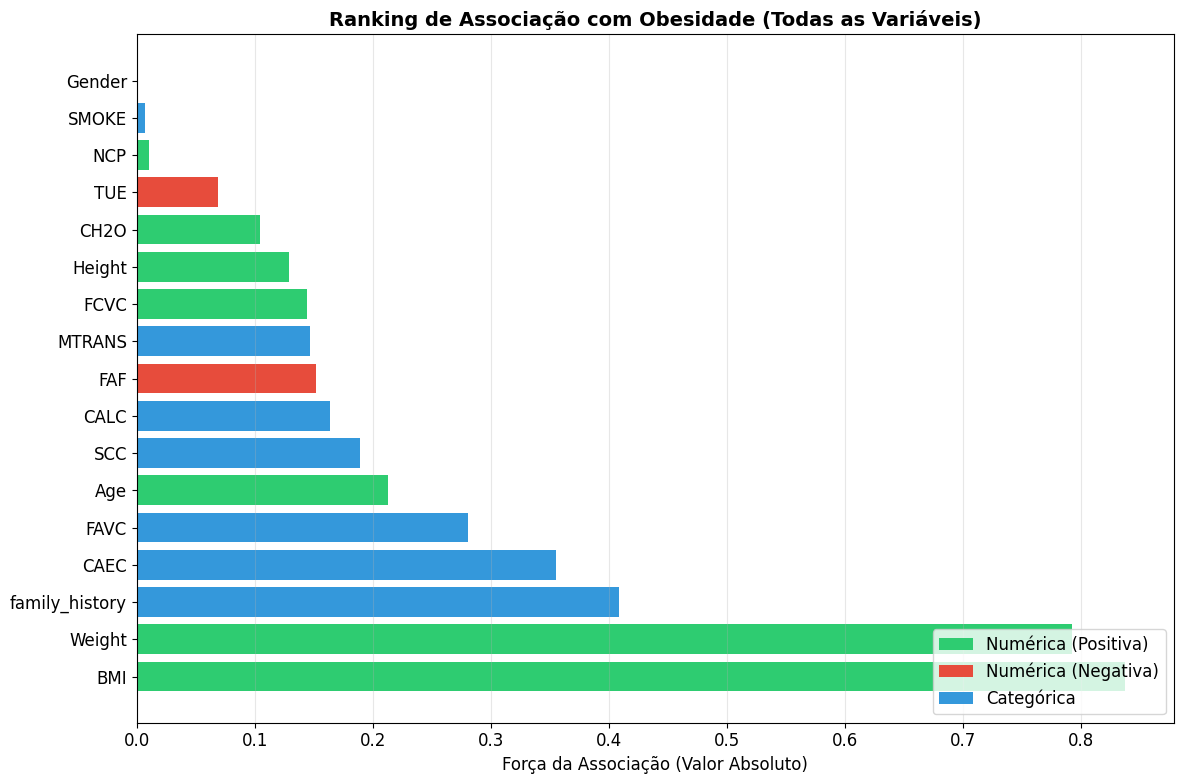

In [24]:
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from matplotlib.patches import Patch

# Análise de Correlação com a Variável Target

# 1. Correlação de Point-Biserial para variáveis numéricas

print("="*80)
print("CORRELAÇÃO COM A VARIÁVEL TARGET (HasObesity)")
print("="*80)

print("\n1. Correlação Point-Biserial (Variáveis Numéricas):\n")
correlacoes_num = {}
for col in ['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']:
    corr, pvalue = pointbiserialr(df['HasObesity'], df[col])
    correlacoes_num[col] = corr
    print(f"{col:15s}: {corr:7.4f} (p-value: {pvalue:.4e})")

# 2. Visualização das correlações numéricas
plt.figure(figsize=(10, 6))
correlacoes_sorted = dict(sorted(correlacoes_num.items(), key=lambda x: abs(x[1]), reverse=True))
colors = ['#e74c3c' if v < 0 else '#2ecc71' for v in correlacoes_sorted.values()]

plt.barh(list(correlacoes_sorted.keys()), list(correlacoes_sorted.values()), color=colors)
plt.xlabel('Correlação Point-Biserial', fontsize=12)
plt.title('Correlação das Variáveis Numéricas com Obesidade', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Cramér's V para variáveis categóricas

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

print("\n2. Cramér's V (Variáveis Categóricas):\n")
correlacoes_cat = {}
for col in ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']:
    cramers = cramers_v(df[col], df['HasObesity'])
    correlacoes_cat[col] = cramers
    print(f"{col:20s}: {cramers:7.4f}")

# 4. Visualização das correlações categóricas
plt.figure(figsize=(10, 6))
correlacoes_cat_sorted = dict(sorted(correlacoes_cat.items(), key=lambda x: x[1], reverse=True))
plt.barh(list(correlacoes_cat_sorted.keys()), list(correlacoes_cat_sorted.values()), color='#3498db')
plt.xlabel("Cramér's V", fontsize=12)
plt.title('Associação das Variáveis Categóricas com Obesidade', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Gráfico combinado de todas as correlações
plt.figure(figsize=(12, 8))

todas_correlacoes = {**correlacoes_num, **correlacoes_cat}
todas_correlacoes_sorted = dict(sorted(todas_correlacoes.items(), key=lambda x: abs(x[1]), reverse=True))

colors = ['#e74c3c' if k in correlacoes_num and todas_correlacoes_sorted[k] < 0 
          else '#2ecc71' if k in correlacoes_num 
          else '#3498db' for k in todas_correlacoes_sorted.keys()]

plt.barh(list(todas_correlacoes_sorted.keys()), 
         [abs(v) for v in todas_correlacoes_sorted.values()], 
         color=colors)
plt.xlabel('Força da Associação (Valor Absoluto)', fontsize=12)
plt.title('Ranking de Associação com Obesidade (Todas as Variáveis)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Legenda
legend_elements = [Patch(facecolor='#2ecc71', label='Numérica (Positiva)'),
                   Patch(facecolor='#e74c3c', label='Numérica (Negativa)'),
                   Patch(facecolor='#3498db', label='Categórica')]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

## Verificação de Outliers

In [25]:
# Função para identificar outliers usando IQR
def identificar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Verificando outliers nas variáveis numéricas
for col in ['Age', 'Height', 'Weight', 'BMI']:
    outliers, lim_inf, lim_sup = identificar_outliers(df, col)
    print(f"\n{col}:")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Limites: [{lim_inf:.2f}, {lim_sup:.2f}]")

# Para este problema, vamos manter os outliers de idade pois podem ser importantes para predizer obesidade


Age:
Número de outliers: 167
Limites: [10.79, 35.13]

Height:
Número de outliers: 1
Limites: [1.42, 1.98]

Weight:
Número de outliers: 1
Limites: [2.98, 171.04]

BMI:
Número de outliers: 0
Limites: [6.78, 53.69]


# **Parte 3 - Preparação dos Dados para Machine Learning**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline

In [27]:
# Definindo a seed para reprodutibilidade
SEED = 42

In [28]:
# Removendo as colunas 'Obesity' e 'Obesity_Category' pois já temos 'HasObesity'
df_ml = df.drop(['Obesity', 'Obesity_Category'], axis=1)

In [29]:
# Separando dados de treino e teste
train_df, test_df = train_test_split(df_ml, test_size=0.2, random_state=SEED, stratify=df_ml['HasObesity'])

In [30]:
print(f"Tamanho do conjunto de treino: {train_df.shape}")
print(f"Tamanho do conjunto de teste: {test_df.shape}")

print(f"\nDistribuição no conjunto de treino:")
print(train_df['HasObesity'].value_counts(normalize=True) * 100)

print(f"\nDistribuição no conjunto de teste:")
print(test_df['HasObesity'].value_counts(normalize=True) * 100)

Tamanho do conjunto de treino: (1669, 18)
Tamanho do conjunto de teste: (418, 18)

Distribuição no conjunto de treino:
HasObesity
0    53.445177
1    46.554823
Name: proportion, dtype: float64

Distribuição no conjunto de teste:
HasObesity
0    53.349282
1    46.650718
Name: proportion, dtype: float64


## Criação do Pipeline de Transformação

In [32]:
# Classe para normalização Min-Max
class MinMaxTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, features=['Age', 'Height', 'Weight', 'BMI']):
        self.features = features
        self.scaler = None
    
    def fit(self, df):
        self.scaler = MinMaxScaler()
        self.scaler.fit(df[self.features])
        return self
    
    def transform(self, df):
        if set(self.features).issubset(df.columns):
            df_copy = df.copy()
            df_copy[self.features] = self.scaler.transform(df_copy[self.features])
            return df_copy
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [33]:
# Classe para Label Encoding de variáveis binárias
class BinaryEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, binary_features=['Gender', 'family_history', 'FAVC', 'SMOKE', 'SCC']):
        self.binary_features = binary_features
        self.encoders = {}
    
    def fit(self, df):
        for feature in self.binary_features:
            if feature in df.columns:
                le = LabelEncoder()
                le.fit(df[feature])
                self.encoders[feature] = le
        return self
    
    def transform(self, df):
        df_copy = df.copy()
        for feature, encoder in self.encoders.items():
            if feature in df_copy.columns:
                df_copy[feature] = encoder.transform(df_copy[feature])
        return df_copy

In [34]:
# Classe para One-Hot Encoding
class OneHotEncodingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, onehot_features=['CAEC', 'CALC', 'MTRANS']):
        self.onehot_features = onehot_features
        self.encoder = None
        self.feature_names = None
    
    def fit(self, df):
        if set(self.onehot_features).issubset(df.columns):
            self.encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
            self.encoder.fit(df[self.onehot_features])
            self.feature_names = self.encoder.get_feature_names_out(self.onehot_features)
        return self
    
    def transform(self, df):
        if set(self.onehot_features).issubset(df.columns):
            df_copy = df.copy()
            
            # Aplicando one-hot encoding
            encoded = self.encoder.transform(df_copy[self.onehot_features])
            df_encoded = pd.DataFrame(encoded, columns=self.feature_names, index=df_copy.index)
            
            # Removendo as colunas originais
            df_copy = df_copy.drop(self.onehot_features, axis=1)
            
            # Concatenando com as colunas codificadas
            df_full = pd.concat([df_copy, df_encoded], axis=1)
            return df_full
        else:
            print('Uma ou mais features não estão no DataFrame')
            return df

In [35]:
# Criando o pipeline
pipeline = Pipeline([
    ('binary_encoder', BinaryEncoder()),
    ('onehot_encoder', OneHotEncodingTransformer()),
    ('min_max_scaler', MinMaxTransformer())
])

# **Parte 4 - Treinamento dos Modelos**

In [36]:
# Aplicando o pipeline nos dados de treino (fit_transform)
train_processed = pipeline.fit_transform(train_df)

print("Distribuição no conjunto de treino processado:")
print(train_processed['HasObesity'].value_counts())
print("\nPercentual:")
print(train_processed['HasObesity'].value_counts(normalize=True) * 100)

Distribuição no conjunto de treino processado:
HasObesity
0    892
1    777
Name: count, dtype: int64

Percentual:
HasObesity
0    53.445177
1    46.554823
Name: proportion, dtype: float64


In [37]:
train_processed.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
2107,0,0.169850,0.563366,0.705166,1,1,3.0,3.0,0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1254,1,0.148636,0.623591,0.475700,1,1,2.0,3.0,0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
688,1,0.079360,0.533702,0.085365,0,1,2.0,3.0,0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
198,0,0.085106,0.264151,0.001126,1,1,2.0,1.0,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1241,0,0.573438,0.173815,0.301539,1,1,2.0,1.0,0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
# Separando X e y de treino
X_train = train_processed.drop('HasObesity', axis=1)
y_train = train_processed['HasObesity']

In [39]:
# Processando dados de teste (apenas transform, usando o pipeline já ajustado no treino)
test_processed = pipeline.transform(test_df)

In [40]:
# Separando X e y de teste
X_test = test_processed.drop('HasObesity', axis=1)
y_test = test_processed['HasObesity']

## Função para Avaliar Modelos

In [41]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from scipy import stats

In [42]:
def avaliar_modelo(modelo, nome_modelo):
    """
    Função para treinar e avaliar um modelo de classificação
    """
    print(f"\n{'='*80}")
    print(f"RESULTADOS DO MODELO: {nome_modelo}")
    print(f"{'='*80}\n")
    
    # Treinando o modelo
    modelo.fit(X_train, y_train)
    
    # Fazendo previsões
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)
    
    # 1. AUC Score
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    print(f"AUC Score: {auc:.4f}\n")
    
    # 2. Teste KS
    data_bom = np.sort(y_pred_proba[:, 0])
    data_mau = np.sort(y_pred_proba[:, 1])
    ks_statistic, ks_pvalue = stats.ks_2samp(data_bom, data_mau)
    print(f"Teste KS:")
    print(f"  Estatística KS: {ks_statistic:.4f}")
    print(f"  P-valor: {ks_pvalue:.4e}\n")
    
    # 3. Matriz de Confusão
    print("Matriz de Confusão (Normalizada em %):\n")
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                   display_labels=['Sem Obesidade', 'Com Obesidade'])
    disp.plot(ax=ax, cmap='Blues', values_format='.1%')
    ax.set_title(f'Matriz de Confusão - {nome_modelo}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # 4. Classification Report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred, 
                               target_names=['Sem Obesidade', 'Com Obesidade'],
                               zero_division=0))
    
    # 5. Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=f'{nome_modelo} (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
    plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
    plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=12)
    plt.title(f'Curva ROC - {nome_modelo}', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return modelo, auc

## Modelo 1: Regressão Logística


RESULTADOS DO MODELO: Regressão Logística

AUC Score: 0.9983

Teste KS:
  Estatística KS: 0.0981
  P-valor: 3.5792e-02

Matriz de Confusão (Normalizada em %):



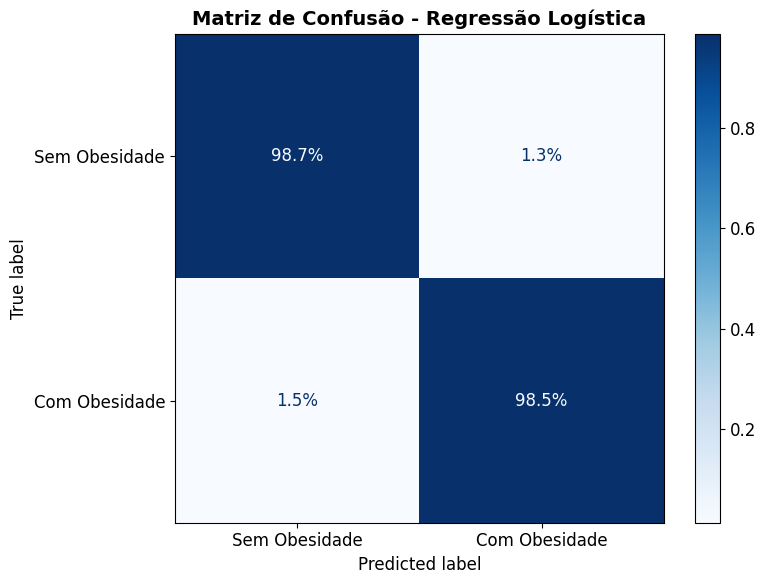


Classification Report:

               precision    recall  f1-score   support

Sem Obesidade       0.99      0.99      0.99       223
Com Obesidade       0.98      0.98      0.98       195

     accuracy                           0.99       418
    macro avg       0.99      0.99      0.99       418
 weighted avg       0.99      0.99      0.99       418



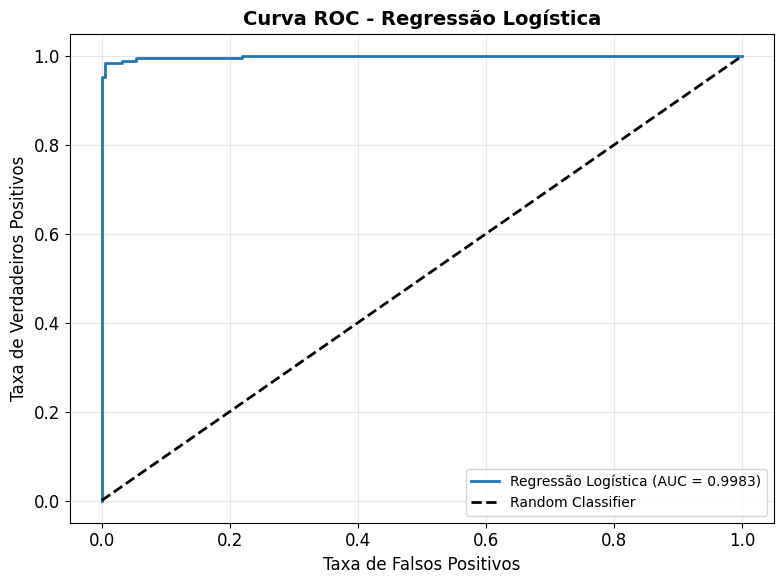

In [43]:
from sklearn.linear_model import LogisticRegression

modelo_logistico = LogisticRegression(random_state=SEED, max_iter=1000)
modelo_logistico_trained, auc_logistico = avaliar_modelo(modelo_logistico, 'Regressão Logística')

## Modelo 2: Ridge Classifier


RESULTADOS DO MODELO: Ridge Classifier

AUC Score: 0.9983

Teste KS:
  Estatística KS: 0.1029
  P-valor: 2.3925e-02

Matriz de Confusão (Normalizada em %):



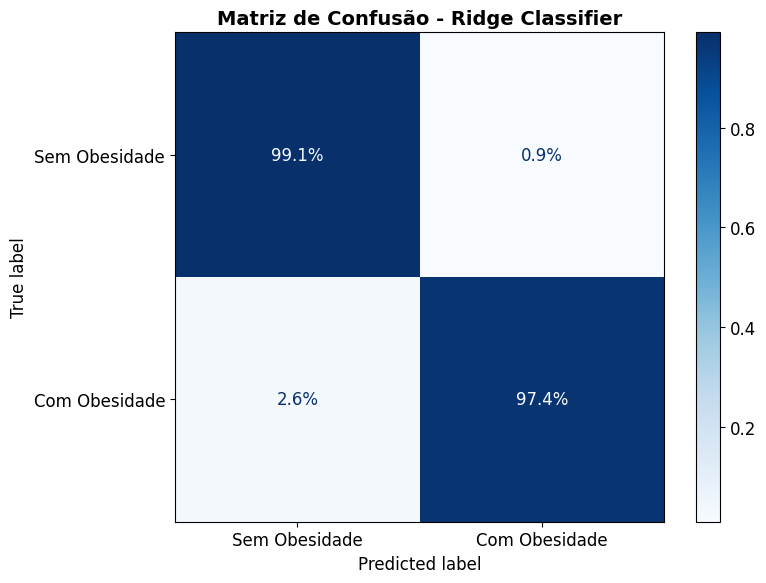


Classification Report:

               precision    recall  f1-score   support

Sem Obesidade       0.98      0.99      0.98       223
Com Obesidade       0.99      0.97      0.98       195

     accuracy                           0.98       418
    macro avg       0.98      0.98      0.98       418
 weighted avg       0.98      0.98      0.98       418



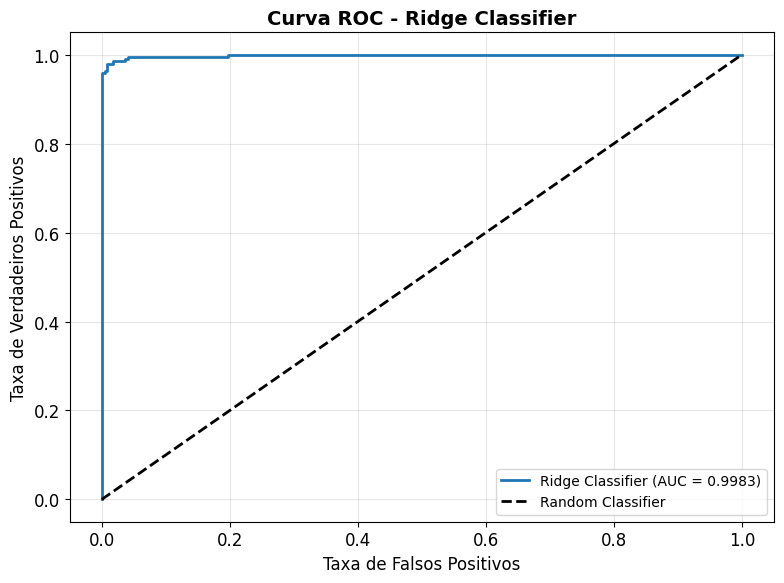

In [44]:
from sklearn.linear_model import RidgeClassifier
from sklearn.calibration import CalibratedClassifierCV

# Ridge Classifier não tem predict_proba nativamente, então usamos CalibratedClassifierCV
modelo_ridge_base = RidgeClassifier(random_state=SEED)
modelo_ridge = CalibratedClassifierCV(modelo_ridge_base, cv=5)
modelo_ridge_trained, auc_ridge = avaliar_modelo(modelo_ridge, 'Ridge Classifier')

## Modelo 3: SGD Classifier (Stochastic Gradient Descent)


RESULTADOS DO MODELO: SGD Classifier

AUC Score: 0.9990

Teste KS:
  Estatística KS: 0.2081
  P-valor: 2.4479e-08

Matriz de Confusão (Normalizada em %):



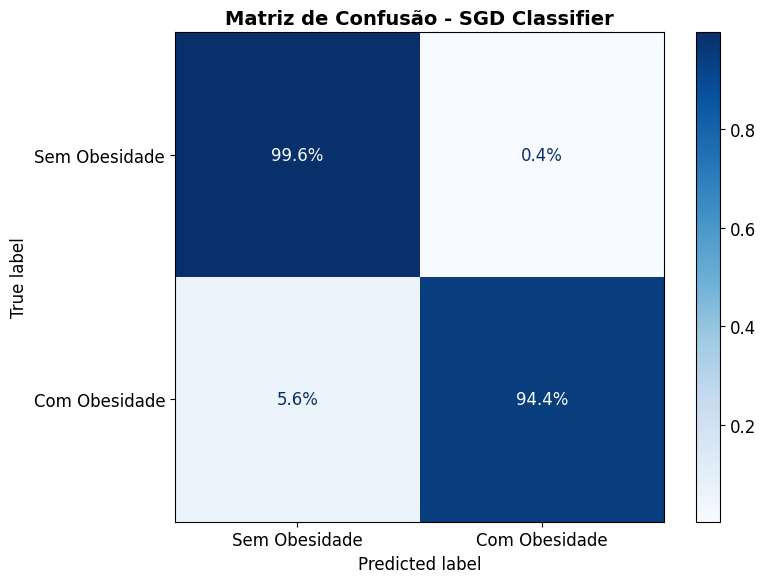


Classification Report:

               precision    recall  f1-score   support

Sem Obesidade       0.95      1.00      0.97       223
Com Obesidade       0.99      0.94      0.97       195

     accuracy                           0.97       418
    macro avg       0.97      0.97      0.97       418
 weighted avg       0.97      0.97      0.97       418



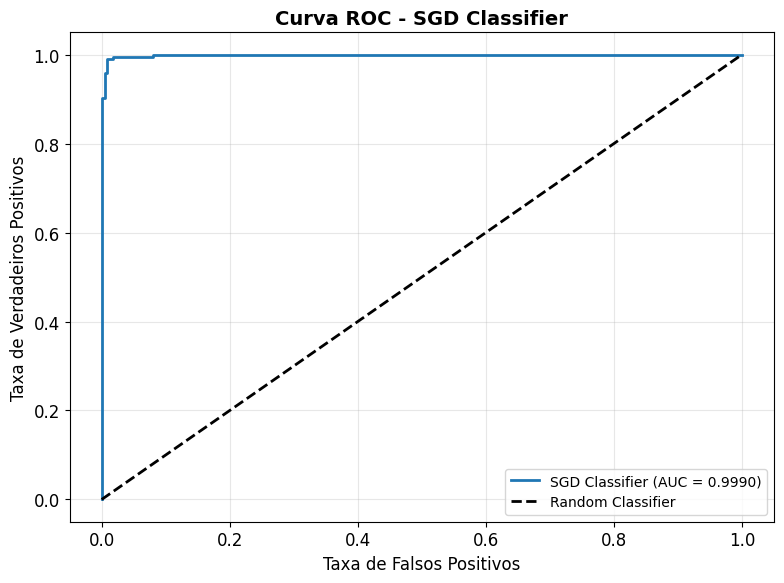

In [45]:
from sklearn.linear_model import SGDClassifier

modelo_sgd = SGDClassifier(loss='log_loss', random_state=SEED, max_iter=1000, tol=1e-3)
modelo_sgd_trained, auc_sgd = avaliar_modelo(modelo_sgd, 'SGD Classifier')

# **Parte 5 - Comparação dos Modelos**

In [46]:
# Comparando os resultados dos modelos - Coletando todas as métricas

# Função auxiliar para extrair métricas da matriz de confusão e classification report
def extrair_metricas(modelo, X_test, y_test, nome_modelo):
    y_pred = modelo.predict(X_test)
    y_pred_proba = modelo.predict_proba(X_test)
    
    # AUC Score
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    
    # Matriz de confusão normalizada
    cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
    
    # Extraindo métricas da matriz de confusão
    # cm_norm[0,0] = Taxa de Verdadeiros Negativos (sem obesidade corretamente classificado)
    # cm_norm[0,1] = Taxa de Falsos Positivos (sem obesidade classificado como com obesidade)
    # cm_norm[1,0] = Taxa de Falsos Negativos (com obesidade classificado como sem obesidade)
    # cm_norm[1,1] = Taxa de Verdadeiros Positivos (com obesidade corretamente classificado)
    
    taxa_vn = cm_norm[0, 0] * 100  # Verdadeiros Negativos
    taxa_fp = cm_norm[0, 1] * 100  # Falsos Positivos
    taxa_fn = cm_norm[1, 0] * 100  # Falsos Negativos
    taxa_vp = cm_norm[1, 1] * 100  # Verdadeiros Positivos (Sensibilidade/Recall)
    
    # Especificidade = Taxa de Verdadeiros Negativos
    especificidade = taxa_vn
    
    # Acurácia geral
    from sklearn.metrics import accuracy_score
    acuracia = accuracy_score(y_test, y_pred) * 100
    
    return {
        'Modelo': nome_modelo,
        'AUC Score': auc,
        'Acurácia (%)': acuracia,
        'Sensibilidade (%)': taxa_vp,  # Taxa de detecção de obesidade
        'Especificidade (%)': especificidade,  # Taxa de detecção de não-obesidade
        'Falsos Positivos (%)': taxa_fp,
        'Falsos Negativos (%)': taxa_fn
    }

# Extraindo métricas de todos os modelos
metricas_logistico = extrair_metricas(modelo_logistico_trained, X_test, y_test, 'Regressão Logística')
metricas_ridge = extrair_metricas(modelo_ridge_trained, X_test, y_test, 'Ridge Classifier')
metricas_sgd = extrair_metricas(modelo_sgd_trained, X_test, y_test, 'SGD Classifier')

# Criando DataFrame com todas as métricas
resultados = pd.DataFrame([metricas_logistico, metricas_ridge, metricas_sgd])

# Ordenando por AUC Score
resultados = resultados.sort_values('AUC Score', ascending=False).reset_index(drop=True)

print("\n" + "="*100)
print("COMPARAÇÃO COMPLETA DOS MODELOS")
print("="*100 + "\n")
print(resultados.to_string(index=False))
print("\n" + "="*100)


COMPARAÇÃO COMPLETA DOS MODELOS

             Modelo  AUC Score  Acurácia (%)  Sensibilidade (%)  Especificidade (%)  Falsos Positivos (%)  Falsos Negativos (%)
     SGD Classifier   0.998965     97.129187          94.358974           99.551570              0.448430              5.641026
   Ridge Classifier   0.998344     98.325359          97.435897           99.103139              0.896861              2.564103
Regressão Logística   0.998298     98.564593          98.461538           98.654709              1.345291              1.538462



In [47]:
# Análise para escolha do melhor modelo
print("\n" + "="*100)
print("ANÁLISE PARA ESCOLHA DO MELHOR MODELO")
print("="*100 + "\n")

print("📊 CRITÉRIOS DE AVALIAÇÃO:\n")
print("1. AUC Score: Capacidade geral de discriminação entre as classes")
print("2. Sensibilidade (Recall): % de casos de obesidade corretamente detectados")
print("3. Especificidade: % de casos sem obesidade corretamente identificados")
print("4. Falsos Negativos: % de casos de obesidade que NÃO foram detectados (CRÍTICO)")
print("5. Falsos Positivos: % de casos sem obesidade classificados como obesidade")

print("\n🏥 CONTEXTO MÉDICO:")
print("Em diagnóstico de obesidade, FALSOS NEGATIVOS são mais graves que FALSOS POSITIVOS:")
print("  • Falso Negativo: Pessoa com obesidade não é diagnosticada → NÃO recebe tratamento")
print("  • Falso Positivo: Pessoa sem obesidade é diagnosticada → Passa por exames adicionais")

print("\n📈 ANÁLISE DOS MODELOS:\n")

# Destacando o modelo com melhor AUC
melhor_auc_modelo = resultados.loc[resultados['AUC Score'].idxmax(), 'Modelo']
melhor_auc = resultados['AUC Score'].max()

# Destacando o modelo com menor taxa de falsos negativos
menor_fn_modelo = resultados.loc[resultados['Falsos Negativos (%)'].idxmin(), 'Modelo']
menor_fn = resultados['Falsos Negativos (%)'].min()

# Destacando o modelo com melhor sensibilidade
melhor_sens_modelo = resultados.loc[resultados['Sensibilidade (%)'].idxmax(), 'Modelo']
melhor_sens = resultados['Sensibilidade (%)'].max()

print(f"✅ Melhor AUC Score: {melhor_auc_modelo} ({melhor_auc:.4f})")
print(f"✅ Melhor Sensibilidade: {melhor_sens_modelo} ({melhor_sens:.2f}%)")
print(f"✅ Menor Taxa de Falsos Negativos: {menor_fn_modelo} ({menor_fn:.2f}%)")

print("\n" + "="*100)
print("RECOMENDAÇÃO DE MODELO")
print("="*100 + "\n")

# Critério de escolha: priorizar menor taxa de falsos negativos para contexto médico
melhor_modelo_nome = menor_fn_modelo
melhor_modelo_row = resultados[resultados['Modelo'] == melhor_modelo_nome].iloc[0]

print(f"🎯 MODELO RECOMENDADO: {melhor_modelo_nome}\n")
print("JUSTIFICATIVA:")
print(f"  • AUC Score: {melhor_modelo_row['AUC Score']:.4f}")
print(f"  • Sensibilidade: {melhor_modelo_row['Sensibilidade (%)']:.2f}% (detecta {melhor_modelo_row['Sensibilidade (%)']:.2f}% dos casos de obesidade)")
print(f"  • Falsos Negativos: {melhor_modelo_row['Falsos Negativos (%)']:.2f}% (MENOR taxa - crítico em diagnóstico médico)")
print(f"  • Especificidade: {melhor_modelo_row['Especificidade (%)']:.2f}%")
print(f"  • Falsos Positivos: {melhor_modelo_row['Falsos Positivos (%)']:.2f}%")

print("\n💡 OBSERVAÇÃO:")
if melhor_modelo_nome != melhor_auc_modelo:
    print(f"Embora o modelo '{melhor_auc_modelo}' tenha o melhor AUC Score ({melhor_auc:.4f}),")
    print(f"escolhemos '{melhor_modelo_nome}' porque tem a MENOR taxa de Falsos Negativos,")
    print("o que é mais importante em um contexto de diagnóstico médico.")
else:
    print(f"O modelo '{melhor_modelo_nome}' apresenta o melhor desempenho em múltiplas métricas.")

print("\n" + "="*100)


ANÁLISE PARA ESCOLHA DO MELHOR MODELO

📊 CRITÉRIOS DE AVALIAÇÃO:

1. AUC Score: Capacidade geral de discriminação entre as classes
2. Sensibilidade (Recall): % de casos de obesidade corretamente detectados
3. Especificidade: % de casos sem obesidade corretamente identificados
4. Falsos Negativos: % de casos de obesidade que NÃO foram detectados (CRÍTICO)
5. Falsos Positivos: % de casos sem obesidade classificados como obesidade

🏥 CONTEXTO MÉDICO:
Em diagnóstico de obesidade, FALSOS NEGATIVOS são mais graves que FALSOS POSITIVOS:
  • Falso Negativo: Pessoa com obesidade não é diagnosticada → NÃO recebe tratamento
  • Falso Positivo: Pessoa sem obesidade é diagnosticada → Passa por exames adicionais

📈 ANÁLISE DOS MODELOS:

✅ Melhor AUC Score: SGD Classifier (0.9990)
✅ Melhor Sensibilidade: Regressão Logística (98.46%)
✅ Menor Taxa de Falsos Negativos: Regressão Logística (1.54%)

RECOMENDAÇÃO DE MODELO

🎯 MODELO RECOMENDADO: Regressão Logística

JUSTIFICATIVA:
  • AUC Score: 0.9983
  

# **Parte 6 - Salvando o Melhor Modelo**

In [48]:
import joblib

# Determinando qual modelo salvar
if melhor_modelo_nome == 'Regressão Logística':
    melhor_modelo = modelo_logistico_trained
elif melhor_modelo_nome == 'Ridge Classifier':
    melhor_modelo = modelo_ridge_trained
else:
    melhor_modelo = modelo_sgd_trained

# Salvando o modelo na pasta 'modelo'
joblib.dump(melhor_modelo, '../modelo/final_model.joblib')
print(f"\nModelo '{melhor_modelo_nome}' salvo com sucesso como 'modelo/final_model.joblib'")

# Salvando o pipeline treinado
joblib.dump(pipeline, '../modelo/pipeline.joblib')
print("\nPipeline de transformação salvo com sucesso como 'modelo/pipeline.joblib'")


Modelo 'Regressão Logística' salvo com sucesso como 'modelo/final_model.joblib'

Pipeline de transformação salvo com sucesso como 'modelo/pipeline.joblib'
